# Original Voce-Chaboche Model Fitting Example 1

An example of fitting the original Voce-Chaboche model to a set of test data is provided.

Documentation for all the functions used in this example can be found by either looking at docstrings for any of the functions.

In [1]:
import RESSPyLab as rpl
import numpy as np

## Run optimization with multiple test data set

This is a simple example for fitting the Voce-Chaboche model to a set of test data.
We only use two backstresses in this model, additional backstresses can be specified by adding pairs of `0.1`'s to the list of `x_0`. 
E.g., three backstresses would be 
```
x_0 = [200000., 355., 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
```
Likewise, one backstress can be specified by removing a pair of `0.1`'s from the list below.

The overall steps to calibrate the model parameters are as follows:
1. Load the set of test data
2. Choose a starting point
3. Set the location to save the analysis history
4. Run the analysis

In [2]:
# Specify the true stress-strain to be used in the calibration
data_files = ['example_1.csv', 'example_2.csv']

# Set initial parameters for the Voce-Chaboche model with two backstresses
# [E, \sigma_{y0}, Q_\infty, b, C_1, \gamma_1, C_2, \gamma_2]
x_0 = [200000., 355., 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Log files for the parameters at each step, and values of the objective function at each step
x_log = './output/x_log.txt'
fxn_log = './output/fxn_log.txt'

# Run the calibration
# Set filter_data=True if you have NOT already filtered/reduced the data
# We recommend that you filter/reduce the data beforehand (i.e., filter_data=False is recommended)
x_sol = rpl.vc_param_opt(x_0, data_files, x_log, fxn_log, filter_data=False)

##########      New Lagrangian Step      ###########

It. = 1:	f(x) = 1.776900e+04 ; ||grad[L]|| = 4.457609e+03
x =  [195950.328    358.78       0.103      0.103      0.103      0.103
      0.103      0.103]

It. = 2:	f(x) = 1.678451e+04 ; ||grad[L]|| = 3.637696e+03
x =  [188235.796    366.279      0.111      0.111      0.111      0.111
      0.111      0.111]

It. = 3:	f(x) = 1.503061e+04 ; ||grad[L]|| = 2.315072e+03
x =  [174044.419    380.87       0.129      0.129      0.129      0.128
      0.129      0.128]

It. = 4:	f(x) = 1.229817e+04 ; ||grad[L]|| = 9.774096e+02
x =  [161424.996    393.164      0.172      0.172      0.171      0.171
      0.171      0.171]

It. = 5:	f(x) = 1.082905e+04 ; ||grad[L]|| = 4.142153e+02
x =  [156018.713    395.592      0.229      0.229      0.229      0.228
      0.229      0.228]

It. = 6:	f(x) = 1.051169e+04 ; ||grad[L]|| = 1.766804e+02
x =  [152554.241    396.755      0.309      0.308      0.306      0.305
      0.306      0.305]

It. = 7:	f(x) = 

## Plot results

After the analysis is finished we can plot the test data versus the fitted model. 
Note that we add two dummy parameters to the list of final parameters because the plotting function was written for the updated Voce-Chaboche model that has two additional parameters. 
Setting the first of these two additional parameters equal to zero neglects the effects of the updated model.

If we set `output_dir='./output/'`, for example, instead of `output_dir=''` the `uvc_data_plotter` function will save pdf's of all the plots instead of displaying them below.

The function `uvc_data_multi_plotter` is also provided to give more fine-grained control over the plotting process, and can compare multiple analyses.

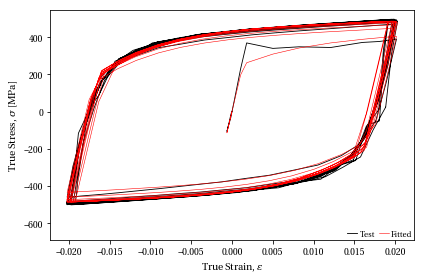

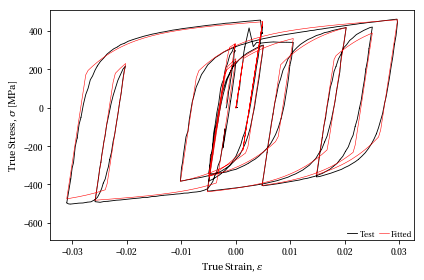

[<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>]

In [3]:
data = rpl.load_data_set(data_files)
# Added parameters are necessary for plotting the Voce-Chaboche model
x_sol_2 = np.insert(x_sol, 4, [0., 1.])
rpl.uvc_data_plotter(x_sol_2, data, output_dir='', file_name='vc_example_plots', plot_label='Fitted')